<a href="https://colab.research.google.com/github/tcathy2009/AI/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('Hello Colab!!')

Hello Colab!!


In [3]:
name = input("請問大名?")
print('Hello '+ name)

請問大名?Cathy
Hello Cathy


# **可在文字區塊放筆記**::

---



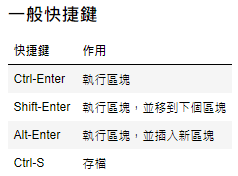